# Redes Q Profundas (DQN) en Machine Learning - Parte I

**SEGÚN FEDERICO:**

Combina redes neuronales con Q-Learning (d'oh!).

La idea es que la red neuronal profunda prediga los valores Q que se van a encargar de estimar **cuán buena es cada acción** dada una determinada **situación particular de un entorno**. Es decir:

1. Entender el **estado del entorno**.

2. Puntuar las **acciones posibles** con valores Q.

3. Escoger el **mejor movimiento**.

4. Aprender de las **consecuencias**, para ajustar los cálculos que hizo antes y mejorar sus predicciones la próxima vez.

5. Explorar **nuevas estrategias** para encontrar maneras más eficientes de hacer las cosas.

### Caso de ejemplo

Uso de dataset `mnist`, que trata de imágenes monocromáticas de dígitos escritos a mano (es como `digits` en la clase de autoencoders, pero aquí son de 28x28 píxeles en vez de 8x8).

In [20]:
import logging as log
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.utils import to_categorical

In [3]:
# Cargar el dataset
(
    (training_images, training_labels),
    (testing_images, testing_labels)
) = mnist.load_data()

In [7]:
# Ver la forma y el contenido de training_images
print(f'{training_images.shape=}')
training_images

training_images.shape=(60000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
# Ver la forma y contenido de training_labels
print(f'{training_labels.shape=}')
training_labels

training_labels.shape=(60000,)


array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
# Ver la forma y contenido de testing_images
print(f'{testing_images.shape=}')
testing_images

testing_images.shape=(10000, 28, 28)


array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [10]:
# Ver la forma y contenido de testing_labels
print(f'{testing_labels.shape=}')
testing_labels

testing_labels.shape=(10000,)


array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [11]:
# Ver la primera imagen de training_images
training_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Como se observa preliminarmente, cada imagen es como un mapa de bits monocromo, cuyos pixeles van de valores desde `0` (negro) hasta `255` (blanco). Podemos verificar esto usando `matplotlib`.

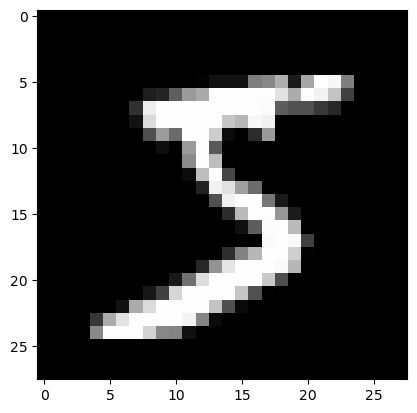

In [ ]:
# Ver la primera imagen de training_images en matplotlib
plt.imshow(training_images[0], cmap='gray')
plt.show()

...lo que nos parece indicar un número `5`. Esto es concordante con la etiqueta correspondiente.

In [14]:
training_labels[0]

5

Cada dígito manuscrito (y su correspondiente etiqueta) van de `0` a `9`.

In [16]:
set(training_labels.tolist())

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

Sin embargo, para asegurarnos de que todo marche bien, procederemos a normalizar los datos.

Recordar que la normalización de los valores de entrada a un rango de `0` a `1` es una práctica común en el aprendizaje profundo para mejorar la estabilidad y la eficiencia del entrenamiento.

In [17]:
# Normalizar los valores de las imágenes
training_images = training_images / 255.0
testing_images = testing_images / 255.0

In [18]:
# Normalizar los valores de las etiquetas
training_labels = to_categorical(training_labels)
testing_labels = to_categorical(testing_labels)

La función `to_categorical` transforma el valor numérico en un array del largo de la cantidad original de valores únicos (de `0` a `9` en este caso) de valores `0` y `1`. El valor original numérico de la etiqueta para una imagen (como el ejemplo de `5`) es el valor `1`, mientras que los demás elementos del array serán `0`.

In [19]:
training_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

##### Entrenamiento

In [21]:
# Definir el modelo
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

La función de activación `'softmax'` se utiliza en la capa de salida para obtener probabilidades para cada clase en problemas de clasificación multiclase. En otras palabras, para convertir las salidas en probabilidades que suman `1`.

In [22]:
# Compilar el modelo
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Recordar que el optimizador guía el entrenamiento ajustando los pesos del modelo para **minimizar la función de pérdida**, mejorando así la precisión del modelo a lo largo del tiempo.

In [23]:
# Entrenar el modelo
model.fit(
    training_images,
    training_labels,
    epochs=5,
    validation_data=(testing_images, testing_labels)
)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 5ms/step - accuracy: 0.5977 - loss: 1.6516 - val_accuracy: 0.8606 - val_loss: 0.5623
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8723 - loss: 0.5065 - val_accuracy: 0.8951 - val_loss: 0.3883
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.8941 - loss: 0.3868 - val_accuracy: 0.9078 - val_loss: 0.3365
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9045 - loss: 0.3395 - val_accuracy: 0.9134 - val_loss: 0.3107
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9088 - loss: 0.3192 - val_accuracy: 0.9157 - val_loss: 0.2938


# Redes Q Profundas (DQN) en Machine Learning - Parte II

El modelo ya ha sido entrenado para recibir una nueva imagen y predecir qué número está representado en ella.

In [24]:
# Generar predicciones
predictions = model.predict(testing_images)
predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


array([[9.4902833e-05, 5.0777498e-08, 3.7456146e-05, ..., 9.9811554e-01,
        7.3410688e-06, 1.0083349e-03],
       [4.4640950e-03, 1.2873703e-05, 9.7440445e-01, ..., 2.5693376e-09,
        2.3954371e-03, 1.0459416e-08],
       [9.7440034e-06, 9.7474569e-01, 1.0696082e-02, ..., 3.7171138e-03,
        3.0939262e-03, 6.6308840e-04],
       ...,
       [2.4389024e-06, 5.3542290e-06, 7.6486125e-05, ..., 1.4392178e-03,
        2.1110283e-02, 9.4781570e-02],
       [2.5428005e-03, 1.4548526e-04, 1.5123254e-04, ..., 1.6164395e-05,
        2.4546470e-01, 1.4440100e-04],
       [9.9545643e-05, 1.8804104e-11, 7.8725621e-05, ..., 2.6555450e-10,
        8.6451377e-07, 3.1878187e-08]], dtype=float32)

Ahora, crear una función que sirva para visualizar una imagen, junto con la etiqueta que el modelo ha predicho y la etiqueta real.

In [31]:
def see_image(
        image: np.ndarray,
        real_label: np.ndarray,
        predictions: np.ndarray
        ) -> None:
    """
    Show the image with the real label and the predicted label.

    Parameters
    ----------
    image : np.ndarray
        The image to show.

    real_label : np.ndarray
        The real label of the image, as a one-hot vector.
    
    predictions : np.ndarray
        The predicted label of the image, as a one-hot vector.

    Returns
    -------
    None

    Requirements
    ------------
    - NumPy (`import numpy as np`)
    - Matplotlib (`import matplotlib.pyplot as plt`)
    """
    image, original_label = image.squeeze(), real_label.argmax()
    predicted_label = predictions.argmax()
    color: str = 'green' if predicted_label == original_label else 'red'

    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image, cmap=plt.cm.get_cmap('binary'))
    plt.xlabel(
        f'Label: {original_label},\nPredicted: {predicted_label}',
        color=color
    )

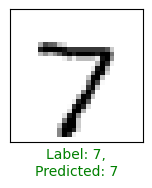

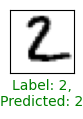

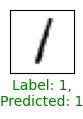

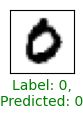

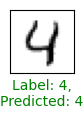

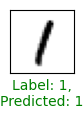

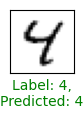

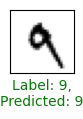

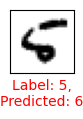

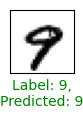

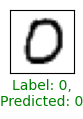

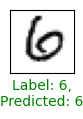

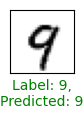

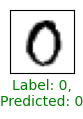

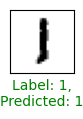

In [32]:
rows: int = 5
cols: int = 3
num_images: int = rows * cols

plt.figure(figsize=(2 * 2 * cols, 2 * rows))

for i in range(num_images):
    plt.subplot(rows, 2 * cols, 2 * i + 1)
    see_image(testing_images[i], testing_labels[i], predictions[i])
    plt.show()